<a href="https://colab.research.google.com/github/glycodynamics/bme-ml/blob/main/04_Biomed_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Analysis**
Heart disease is a term covering any disorder of the heart. Heart diseases have become a major concern to deal with as studies show that the number of deaths due to heart diseases have increased significantly over the past few decades.

Thus preventing Heart disease has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives.

Problem Description :
A dataset is formed by taking into consideration some of the information of 303 individuals. The problem is : based on the given information about each individual we have to calculate whether that individual will suffer from heart disease.

This data set is from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.


## Description of the column names and their values

1. age: The person's **age** in years
2. sex: The person's **sex** (1 = male, 0 = female)
3. cp: The **chest pain** experienced
        1: typical angina,
        2: atypical angina,
        3: non-anginal pain,
        4: asymptomatic

4. trestbps: **T**he person's **resting blood pressure** (mm Hg on admission to the hospital)

5. chol: The Serum **cholesterol** measurement in mg/dl

6. fbs: **Fasting blood sugar** (> 120 mg/dl, 1 = yes; 0 = no)

7. restecg: Resting electrocardiographic (ECG) measurement
          0 = normal
          1 = having ST-T wave abnormality
          2 = showing probable or definite left ventricular hypertrophy

8. thalach: The person's **Max heart rate achieved**: displays the max heart rate achieved by an individual. It should be 220-age or under for good health!

9. exang: **Exercise-induced angina** (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

11. slope: the slope of the peak exercise ST segment
          Value 1: upsloping
          Value 2: flat
          Value 3: downsloping

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called **thalassemia**
          1 = normal;
          2 = fixed defect;
          3 = reversable defect

14. target: **Heart disease** (0 = no, 1 = yes)


#### Dataset source:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease



# **1. Import libraries and read the dataset**

In [2]:
# Importing lib
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**2. Reading Data from GitHub Repository**

In this tutorial, we'll learn how to efficiently read data directly from a GitHub repository into Google Colab. This approach enables seamless integration of datasets stored on GitHub with your Colab notebook, facilitating collaborative work and easy access to shared data.

### Steps to Read Data from GitHub:

1. **Accessing the GitHub Repository:**
   Begin by navigating to the GitHub repository containing the dataset you intend to use. Ensure that the repository is public or that you have appropriate access permissions.

2. **Locating the Data File:**
   Once within the repository, locate the specific data file you wish to read into your Colab notebook. Note the file path relative to the repository's root directory.

3. **Constructing the Raw Data URL:**
   GitHub provides a convenient feature to view the raw content of files hosted in a repository. Construct the raw data URL by appending the file path to the base URL of the repository.

   For example, if the repository URL is `https://github.com/glycodynamics/bme-ml`, and the data file is located at `data/heart.csv`, the raw data URL would be `https://github.com/glycodynamics/bme-ml/raw/main/data/heart.csv"`.

4. **Reading Data into Colab:**
   With the raw data URL obtained, you can now use Python libraries such as Pandas to read the data directly into your Colab notebook. Utilize the appropriate read function based on the file format (e.g., `pd.read_csv()` for CSV files, `pd.read_excel()` for Excel files).


In [3]:
data_df = pd.read_csv("https://github.com/glycodynamics/bme-ml/raw/main/data/heart.csv")
data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#3. Now try printing the data and some statistics

---


- Print top few rows
- Print bottom few rows
- Print the column names


In [12]:
# Display the first few rows
data_df.head()

# Display the first few rows
data_df.tail()

# First two rows for colum 'age' and 'target'
data_df.head(2)[['age','target']]
data_df.loc[0:2, ['age', 'target']]

# Get the dimensions of hd_data
print(data_df.shape)

# Get the column names of hd_data
data_df.info()

# Location based indexing
data_df.iloc[0:2,[0, 13]]



(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,target
0,63,1
1,37,1


4.
**Check statistics**
- Calculate and print the statistics of each column; The describe() method provides description of the data in the DataFrame. The description contains these information for each column:

```
count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.
```

**Check if there are any empty values**
```
data.isnull.sum()
```

In [13]:
data_df.describe()
data_df.isnull()
data_df.isnull.sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Pairplot

**5. Plot the histogram of the columns**



Text(0.5, 1.0, 'Distribution of Age based on Target')

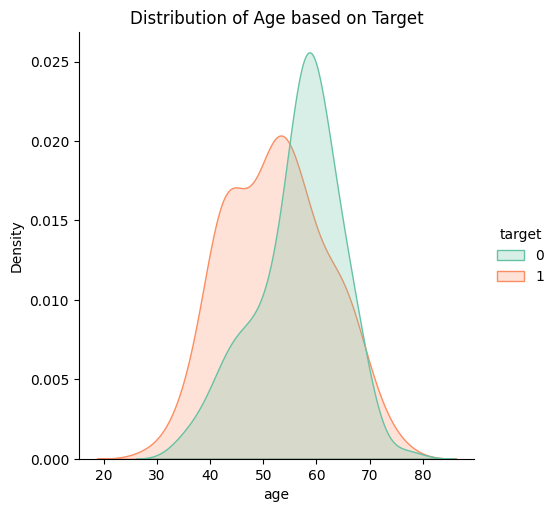

In [5]:
#sns.distplot(data['age'])
# Plotting histograms, kernel density and cumulative density using kind = hist, kde, ecdf
sns.displot(data = data_df, x = 'age', hue = 'target', kind='kde', palette='Set2', fill=True)
plt.title('Distribution of Age based on Target')


(15.0, 90.0)

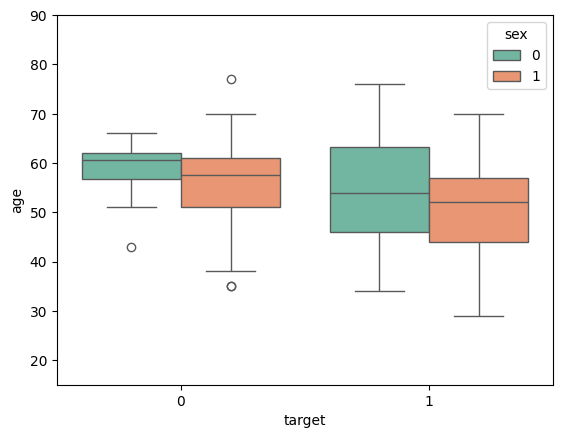

In [ ]:
#sns.boxplot(data['sex'], data['trestbps'])
sns.boxplot(data=data_df, x='target', y='age', hue = 'sex', palette='Set2').set_ylim(15, 90)

(15.0, 90.0)

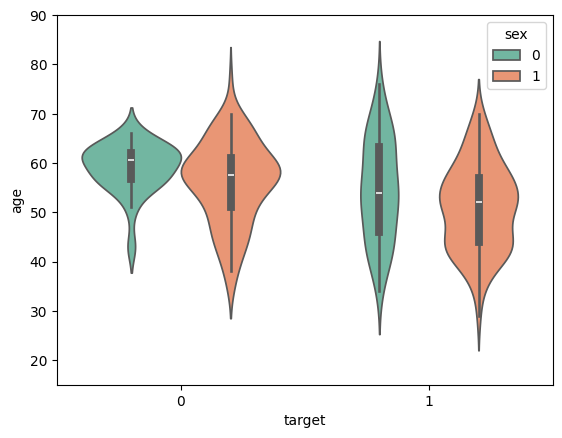

In [ ]:
#sns.violinplot(data=data_df, x='target', y='age', hue = 'sex')
sns.violinplot(data=data_df, x='target', y='age', hue = 'sex', palette='Set2').set_ylim(15, 90)



Age vs Cholestrol (All Patinets)


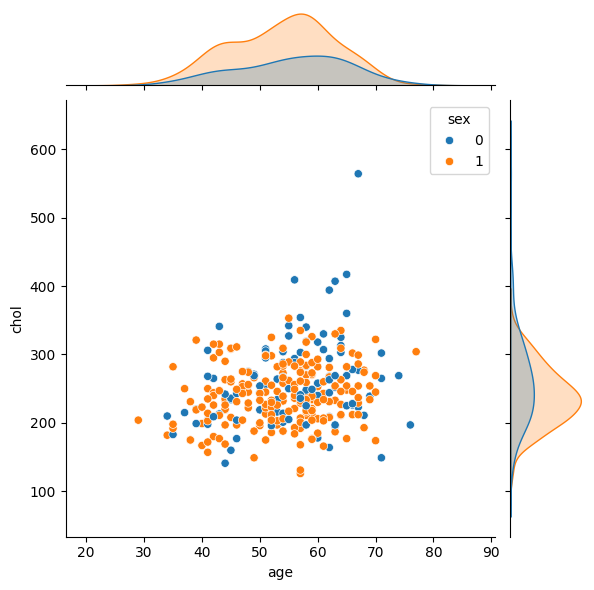

In [15]:
# Join Plots
print('Age vs Cholestrol (All Patinets)')
#sns.jointplot(data=data_df, x='age', y='chol', kind='hex', cmap='Reds')
sns.jointplot(data=data_df, x='age', y='chol', hue = 'sex')

<Axes: >

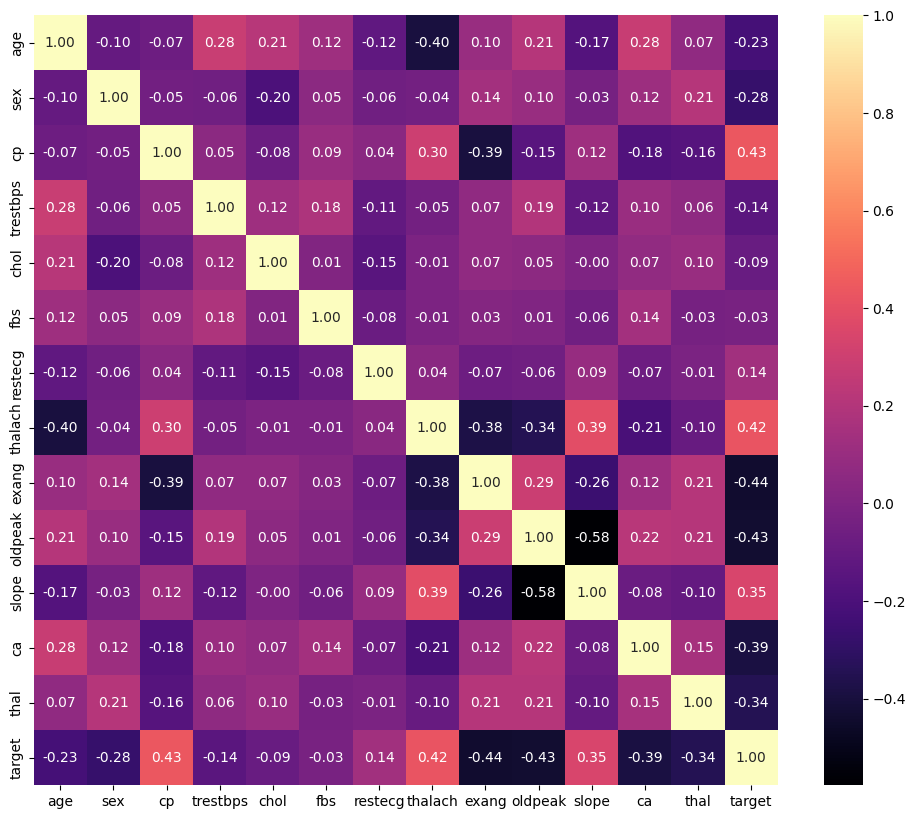

In [ ]:

# Pairplot data
#sns.pairplot(data)

# making a heat map of actual data
#sns.heatmap(data)

## making a heat map of actual correlation
#sns.heatmap(data.corr())

# Making a heat map of correlation with values in cells
plt.figure(figsize=(12,10))
sns.heatmap(data_df.corr(),annot=True,cmap = 'magma', fmt='.2f')


**Ydata Profiling**

- It used to be called pandas profiling earleir!

- ydata-profiling primary goal is to provide a one-line Exploratory Data Analysis (EDA)

- ydata-profiling delivers an extended analysis of a DataFrame while alllowing the data analysis to be exported in different formats such as html and json


In [7]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=1e8d7d36b68240ff839ded7994cdd213f46acc46900cc2c1c98237530bdec4d8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [8]:
import pandas_profiling as pp
pp.ProfileReport(data_df)

<ipython-input-8-70d642fe7b01>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



# 6.Logistic Regression  - Next lesson <a name="6"></a>

**1. Collect Columns:** Identify and select the columns you want to use as features (inputs) and the target column (output) from your dataset.


**2. Split Data (Training, Testing):** Split your dataset into training and testing sets to evaluate the performance of your model.

**3. Normalization of the Data:** Normalize your input features to ensure they are on a similar scale, which can improve the performance of certain models.

**4. Fitting the Model:** Choose a machine learning model and fit it to the training data.

**5.Prediction of the Result for Test Dataset:** Use the trained model to make predictions on the test data.

**6.Calculate Accuracy of Predictions for Test Dataset:** Evaluate the accuracy of the model's predictions on the test data to assess its performance.


**Some Basic Statistics**
1. Does sex of an individual have an effect in the hart disease?
  - Since sex is a binary variable in this dataset the appropriate test is chi-squared test



In [ ]:
# chi-squared test for for two populations (female(o) and male (1))
import scipy.stats as stats
contingency_table = pd.crosstab(data['sex'], data['target'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 22.717227046576355
P-value: 1.8767776216941503e-06


In [ ]:
# # Does age have an effect? Age is continuous, so we use t-test here
import scipy.stats as stats
age_hd_0 = data[data['target'] == 0]['age']
age_hd_1 = data[data['target'] == 1]['age']
#t_statistic, p_value = ttest_ind(age_hd_0, age_hd_1)
t_statistic, p_value = stats.ttest_ind(data[data['target'] == 0]['age'], data[data['target'] == 1]['age'], equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 4.079669145481814
P-value: 5.781030372508417e-05


In [ ]:
import scipy.stats as stats
print(stats.ttest_ind(data['age'], data['target'], equal_var = False))
t_stat, p_value = stats.ttest_ind(data['age'], data['target'], equal_var=False)

# Print the results
print("Welch's t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

print()
# Calculate the mean age for each group based on 'target' values
mean_age_by_target = data.groupby('target')['age'].mean()
print("Mean age for each target group:")
print(mean_age_by_target)


TtestResult(statistic=103.00041313916304, pvalue=2.4882745359625946e-238, df=303.82210664420194)
Welch's t-test:
t-statistic: 103.00041313916304
p-value: 2.4882745359625946e-238

Mean age for each target group:
target
0    56.601449
1    52.496970
Name: age, dtype: float64


In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
